<a href="https://colab.research.google.com/github/anujb6/Ml_notebooks/blob/main/Census_Income.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [21]:
dt = pd.read_csv('/content/sample_data/adult.csv')
dt.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [23]:
dt.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

## Value Count Function

In [42]:
def count(data):
  return data.value_counts()

count(dt['workclass'])
count(dt['education'])
count(dt['marital.status'])
count(dt['occupation'])
count(dt['relationship'])
count(dt['race'])
count(dt['sex'])
count(dt['native.country'])
count(dt['income'])

<=50K    24720
>50K      7841
Name: income, dtype: int64

##Plotting

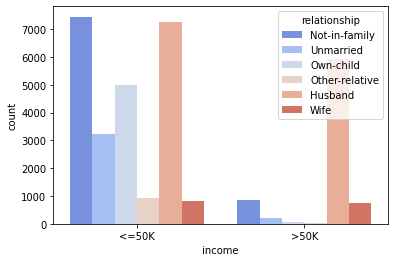

In [27]:
sns.countplot(x = dt['income'], palette='coolwarm', hue='relationship', data = dt);


In [48]:
dt['native.country'] = dt['native.country'].replace('?', 'United-States')
dt['occupation'] = dt['occupation'].replace('?', 'Prof-specialty')
dt['workclass'] = dt['workclass'].replace('?', 'Private')

In [52]:
# education Category
dt.education= dt.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
dt.education = dt.education.replace('HS-grad', 'high school')
dt.education = dt.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')
dt.education = dt.education.replace('Bachelors', 'undergrad')
dt.education = dt.education.replace('Masters', 'grad')
dt.education = dt.education.replace('Doctorate', 'doc')

In [55]:
#martial status
dt['marital.status']= dt['marital.status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
dt['marital.status']= dt['marital.status'].replace(['Never-married'], 'not-married')
dt['marital.status']= dt['marital.status'].replace(['Divorced', 'Separated','Widowed','Married-spouse-absent'], 'other')

In [56]:
# income
dt.income = dt.income.replace('<=50K', 0)
dt.income = dt.income.replace('>50K', 1)

In [58]:
dt.corr()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.009463
education.num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.335154
capital.gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.223329
capital.loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.150526
hours.per.week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.229689
income,0.234037,-0.009463,0.335154,0.223329,0.150526,0.229689,1.000000


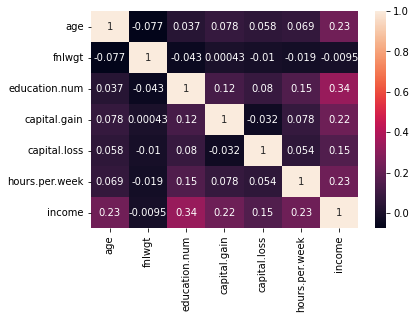

In [60]:
sns.heatmap(dt.corr(), annot=True);

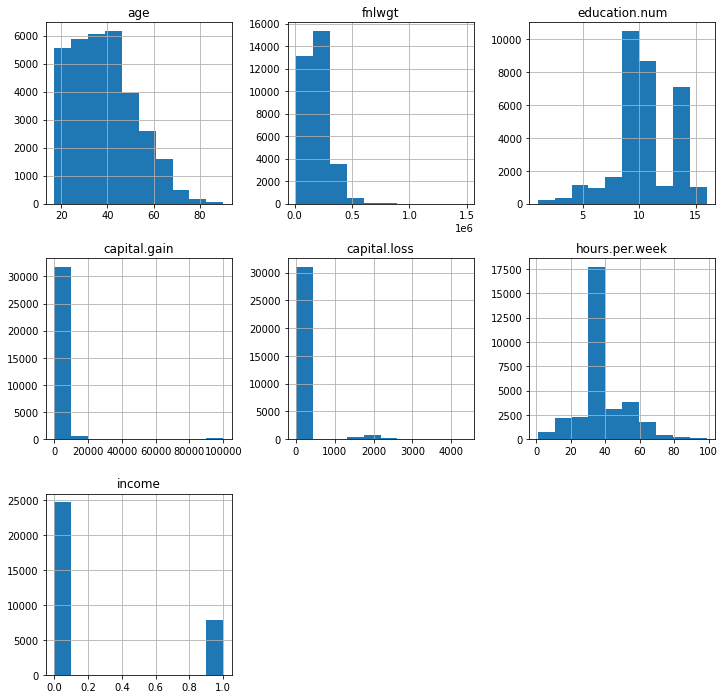

In [62]:
dt.hist(figsize=(12,12), layout=(3,3), sharex=False);

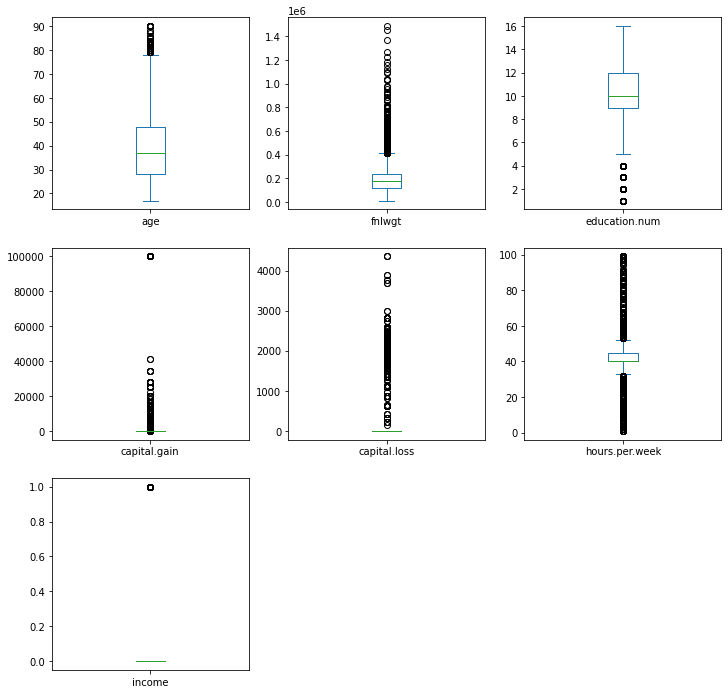

In [64]:
dt.plot(kind='box', figsize=(12,12), layout=(3,3), sharex=False, subplots=True);

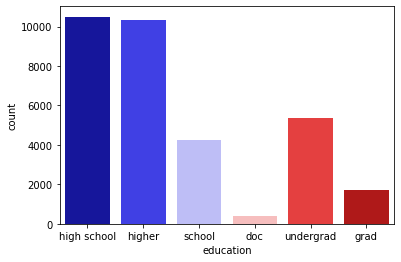

In [74]:
sns.countplot(x = dt['education'], palette='seismic', data=dt);

In [78]:
dt1= dt.copy()
dt1= dt1.apply(LabelEncoder().fit_transform)
dt1.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,72,3,2649,2,8,2,9,1,4,0,0,91,39,38,0
1,65,3,6514,2,8,2,3,1,4,0,0,91,17,38,0
2,49,3,11175,3,9,2,9,4,2,0,0,91,39,38,0
3,37,3,7009,4,3,2,6,4,4,0,0,90,39,38,0
4,24,3,16850,3,9,2,9,3,4,0,0,90,39,38,0


In [80]:
ss= StandardScaler().fit(dt1.drop('income', axis=1))

In [83]:
X= ss.transform(dt1.drop('income', axis=1))
y= dt['income']

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

In [87]:
lr = LogisticRegression()

model = lr.fit(X_train, y_train)
prediction = model.predict(X_test)

print("Acc on training data: {:,.3f}".format(lr.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(lr.score(X_test, y_test)))

Acc on training data: 0.839
Acc on test data: 0.836


In [91]:
rfc = RandomForestClassifier()

model1 = rfc.fit(X_train, y_train)
prediction1 = model1.predict(X_test)

print("Acc on training data: {:,.3f}".format(rfc.score(X_train, y_train)))
print("Acc on test data: {:,.3f}".format(rfc.score(X_test, y_test)))

Acc on training data: 1.000
Acc on test data: 0.857


In [93]:
print(confusion_matrix(y_test, prediction1))

[[6887  519]
 [ 874 1489]]


In [96]:
#Precision: tp/tp+fp
print("precision: ", 6887/(6887 + 519))

precision:  0.9299216851201728
